# Scaling Exericses

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way  you find helpful.
2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

from acquire import get_connection, get_telco_data
from prepare import prep_telco, telco_split

np.random.seed(666)

In [2]:
df = get_telco_data()
df.head(3)

,customer_id,contract_type_id,phone_service,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn
0,0002-ORFBO,2,Yes,1,Female,0,Yes,Yes,9,No,Yes,No,Yes,Yes,No,65.6,593.3,No
1,0003-MKNFE,1,Yes,1,Male,0,No,No,9,No,No,No,No,No,Yes,59.9,542.4,No
2,0004-TLHLJ,1,Yes,2,Male,0,No,No,4,No,No,Yes,No,No,No,73.9,280.85,Yes


In [3]:
df = prep_telco()
df.head(3)

,contract_type,phone,internet_type,senior,partner,depend,tenure,monthly_charges,total_charges,churn,num_add_ons,is_male,tenure_yrs
customer_id,,,,,,,,,,,,,
0002-ORFBO,1,1,0,0,1,1,9,65.6,593.30,0,3,0,0.75
0003-MKNFE,0,1,0,0,0,0,9,59.9,542.40,0,1,1,0.75
0004-TLHLJ,0,1,1,0,0,0,4,73.9,280.85,1,1,1,0.33


> I'm going to clean up the data and modify my prepare.py before moving on, as I neglected to fix the total_charges column before.

In [4]:
df.dtypes

contract_type        int64
phone                int64
internet_type        int64
senior               int64
partner              int64
depend               int64
tenure               int64
monthly_charges    float64
total_charges      float64
churn                int64
num_add_ons          int64
is_male              int64
tenure_yrs         float64
dtype: object

In [5]:
df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')
df.dtypes

contract_type        int64
phone                int64
internet_type        int64
senior               int64
partner              int64
depend               int64
tenure               int64
monthly_charges    float64
total_charges      float64
churn                int64
num_add_ons          int64
is_male              int64
tenure_yrs         float64
dtype: object

In [6]:
df.isnull().sum()

contract_type      0
phone              0
internet_type      0
senior             0
partner            0
depend             0
tenure             0
monthly_charges    0
total_charges      0
churn              0
num_add_ons        0
is_male            0
tenure_yrs         0
dtype: int64

In [7]:
df = df[~df.total_charges.isnull()]
df.shape

(7032, 13)

In [8]:
df.isnull().sum()

contract_type      0
phone              0
internet_type      0
senior             0
partner            0
depend             0
tenure             0
monthly_charges    0
total_charges      0
churn              0
num_add_ons        0
is_male            0
tenure_yrs         0
dtype: int64

In [9]:
# So I'll add these lines to the prep_telco function in my prepare.py file:

#df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')
#df = df[~df.total_charges.isnull()]

# Then I'll re-import the fuction.
from prepare import prep_telco

In [10]:
# run prep_telco and check that it worked correctly
df = prep_telco()
df.head(3)
df.dtypes
df.isnull().sum()

contract_type      0
phone              0
internet_type      0
senior             0
partner            0
depend             0
tenure             0
monthly_charges    0
total_charges      0
churn              0
num_add_ons        0
is_male            0
tenure_yrs         0
dtype: int64

In [11]:
# now to split the data into test, validate, and train

train, validate, test = telco_split(df)
print('Shape of train:', train.shape)
print('\nShape of validate:', validate.shape)
print('\nShape of test:', test.shape)

Shape of train: (3937, 13)

Shape of validate: (1688, 13)

Shape of test: (1407, 13)


In [12]:
train.describe()

,contract_type,phone,internet_type,senior,partner,depend,tenure,monthly_charges,total_charges,churn,num_add_ons,is_male,tenure_yrs
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.686309,0.903226,0.876810,0.163576,0.491237,0.299467,32.426213,64.949886,2293.929947,0.265685,2.047752,0.513081,2.702004
std,0.831847,0.295688,0.734815,0.369938,0.499987,0.458083,24.582762,30.126848,2286.466423,0.441753,1.849180,0.499892,2.048948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.080000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,35.750000,400.300000,0.000000,0.000000,0.000000,0.750000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,29.000000,70.550000,1381.200000,0.000000,2.000000,1.000000,2.420000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,89.900000,3829.750000,1.000000,3.000000,1.000000,4.580000
max,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,72.000000,118.600000,8670.100000,1.000000,6.000000,1.000000,6.000000


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way  you find helpful.

**MinMax Scaler:**

count    3937.000000
mean     2293.929947
std      2286.466423
min        18.800000
25%       400.300000
50%      1381.200000
75%      3829.750000
max      8670.100000
Name: total_charges, dtype: float64


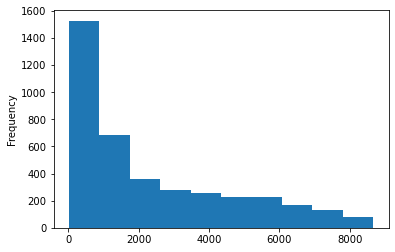

In [13]:
print(train.total_charges.describe())
train.total_charges.plot.hist()

In [14]:
# make the scalar
scaler = sklearn.preprocessing.MinMaxScaler()

# fit the scalar
scaler.fit(train[['total_charges']])

# use the scalar
train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])

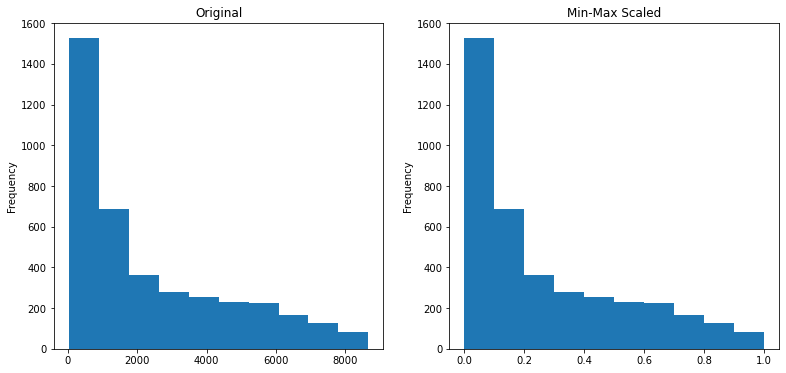

In [15]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Min-Max Scaled')

**Standard Scalar:**

In [16]:
# make the scalar
scaler = sklearn.preprocessing.StandardScaler()

# fit the scalar
scaler.fit(train[['monthly_charges']])

# use the scalar
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

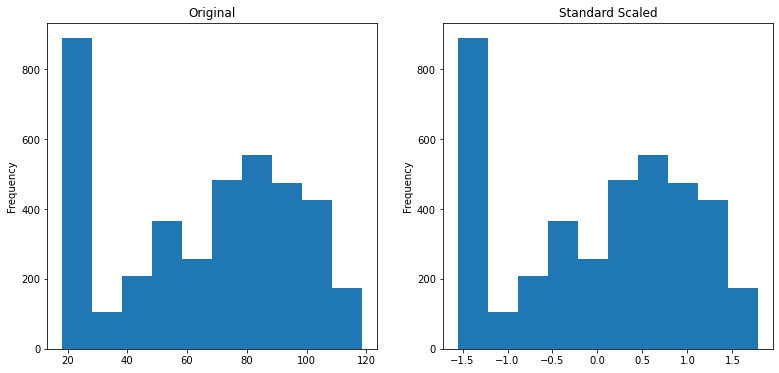

In [17]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Standard Scaled')

**Robust Scalar:**

In [18]:
# make the scalar
scaler = sklearn.preprocessing.RobustScaler()

# fit the scalar
scaler.fit(train[['tenure']])

# use the scalar
train['tenure_scaled'] = scaler.transform(train[['tenure']])
test['tenure_scaled'] = scaler.transform(test[['tenure']])
validate['tenure_scaled'] = scaler.transform(validate[['tenure']])

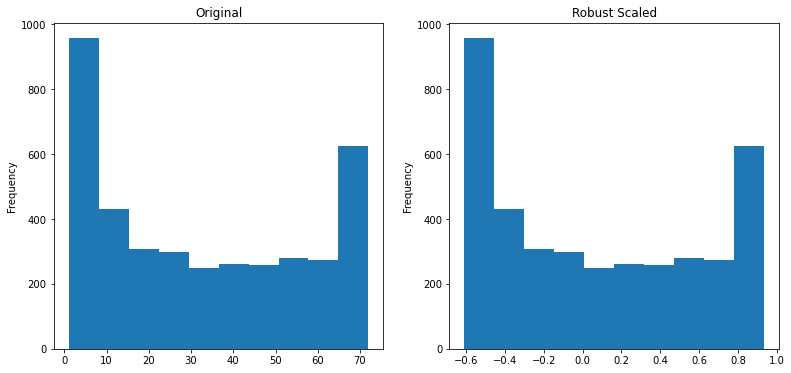

In [19]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tenure.plot.hist(title='Original')
plt.subplot(122)
train.tenure_scaled.plot.hist(title='Robust Scaled')

**QuantileTransformer:**

In [20]:
train.columns

Index(['contract_type', 'phone', 'internet_type', 'senior', 'partner',
       'depend', 'tenure', 'monthly_charges', 'total_charges', 'churn',
       'num_add_ons', 'is_male', 'tenure_yrs', 'total_charges_scaled',
       'monthly_charges_scaled', 'tenure_scaled'],
      dtype='object')

In [21]:
# make the scalar
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# fit the scalar
scaler.fit(train[['num_add_ons']])

# use the scalar
train['num_add_ons_scaled'] = scaler.transform(train[['num_add_ons']])
test['num_add_ons_scaled'] = scaler.transform(test[['num_add_ons']])
validate['num_add_ons_scaled'] = scaler.transform(validate[['num_add_ons']])

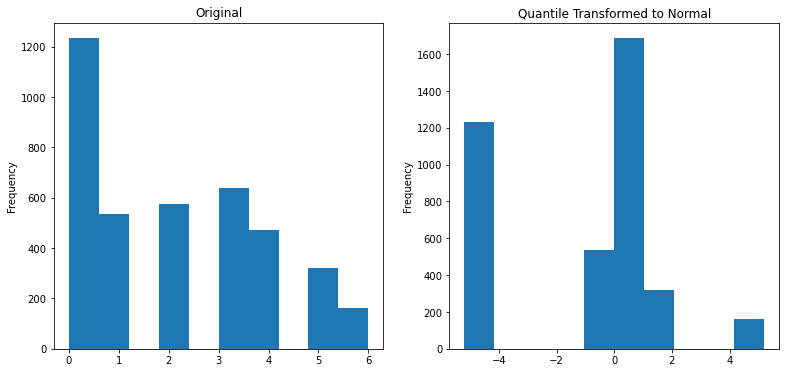

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.num_add_ons.plot.hist(title='Original')
plt.subplot(122)
train.num_add_ons_scaled.plot.hist(title='Quantile Transformed to Normal')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [23]:
unscaled_train = train[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled', 'num_add_ons_scaled']]
unscaled_validate = validate[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled', 'num_add_ons_scaled']]
unscaled_test = test[['total_charges_scaled', 'monthly_charges_scaled', 'tenure_scaled', 'num_add_ons_scaled']]

In [24]:
unscaled_train.head()

,total_charges_scaled,monthly_charges_scaled,tenure_scaled,num_add_ons_scaled
customer_id,,,,
7964-YESJC,0.178083,0.044820,-0.108696,0.458426
7696-CFTAT,0.081756,-1.498850,0.173913,-5.199338
6500-JVEGC,0.819755,1.208382,0.847826,0.907080
2225-ZRGSG,0.758296,0.961063,0.891304,0.907080
0643-OKLRP,0.440055,0.511241,0.391304,-0.301855


In [25]:
# make the scalar
scaler = sklearn.preprocessing.MinMaxScaler()

# fit the scalar
scaler.fit(unscaled_train[['total_charges_scaled']])

# use the scalar
unscaled_train['total_charges_unscaled'] = scaler.inverse_transform(unscaled_train[['total_charges_scaled']])
unscaled_test['total_charges_unscaled'] = scaler.inverse_transform(unscaled_test[['total_charges_scaled']])
unscaled_validate['total_charges_unscaled'] = scaler.inverse_transform(unscaled_validate[['total_charges_scaled']])

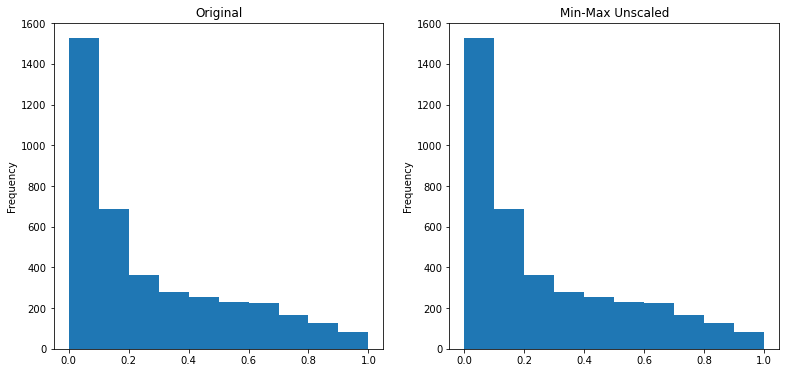

In [26]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
unscaled_train.total_charges_scaled.plot.hist(title='Original')
plt.subplot(122)
unscaled_train.total_charges_unscaled.plot.hist(title='Min-Max Unscaled')

In [ ]:
# make the scalar
scaler = sklearn.preprocessing.MinMaxScaler()

# fit the scalar
scaler.fit(train[['total_charges_scaled']])

# use the scalar
train['total_charges_unscaled'] = scaler.inverse_transform(train[['total_charges_scaled']]) test['total_charges_unscaled'] = scaler.inverse_transform(test[['total_charges_scaled']]) validate['total_charges_unscaled'] = scaler.inverse_transform(unscaled_validate[['total_charges_scaled']])

In [38]:
# make the scalar
#scaler = sklearn.preprocessing.MinMaxScaler()

#x = np.array([train.total_charges_scaled]).reshape(-1, 1)

# fit the scalar
#scaler.fit(x)

# use the scalar
#train['total_charges_unscaled'] = scaler.inverse_transform(train['total_charges_scaled'])
#test['total_charges_unscaled'] = scaler.inverse_transform(test['total_charges_scaled'])
#validate['total_charges_unscaled'] = scaler.inverse_transform(validate['total_charges_scaled'])

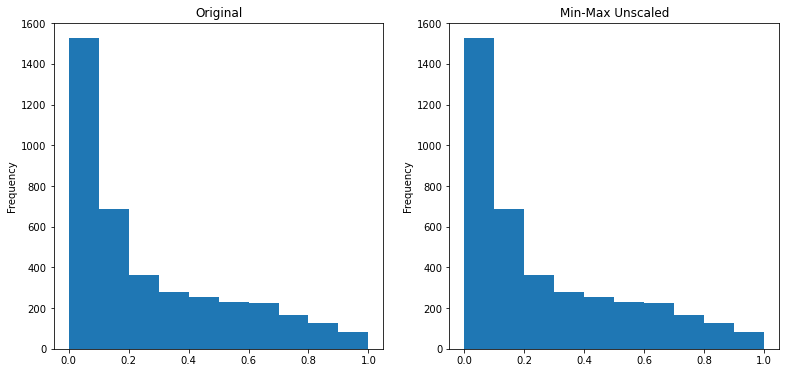

In [39]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges_scaled.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_unscaled.plot.hist(title='Min-Max Unscaled')

> Not sure what I'm doing wrong with the inverse transformer. I'll come back to it later if I can figure it out, but for now in the interest of time I will move on.